# Ghouls, Goblins, and Ghosts...Boo!

### Kaggle Playground Prediction

The purpose of this project is to classify ghastly creatures using an algorithm developed from using the training data set. Intruders will be distinguished by bone length measurements, severity of rot, extent of soullessness, and other characteristics. Link to the kaggle competition page can be found [here](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo). Different classification methods will be explore and the most suitable algorithm will be determined using Jaccard and F-1 scores. The algorithm will then be applied to the test set.

In [1]:
#Importing the necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [2]:
#Importing the training set
train_df = pd.read_csv("train.csv")
train_df[:10]

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


Since there are no null values in the training dataset, let's proceed to data exploration.

### Data Exploratory Analysis

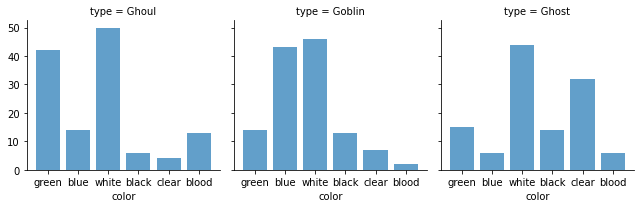

In [4]:
#Plotting color distribution by creature type using seaborn
g = sns.FacetGrid(train_df, col = "type", col_wrap = 3)
g.map(plt.hist, "color", align = "left", bins = range(7), alpha = 0.7, rwidth = 0.8)
plt.show()

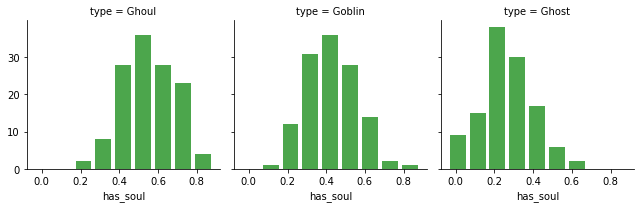

In [5]:
#Plotting has_soul value distribution by creature type
g = sns.FacetGrid(train_df, col = "type", col_wrap = 3)
bins = np.linspace(train_df.has_soul.min(), train_df.has_soul.max(), 10)
g.map(plt.hist, "has_soul", align = "left", color = "green", alpha = 0.7, rwidth = 0.8, bins = bins)
plt.show()

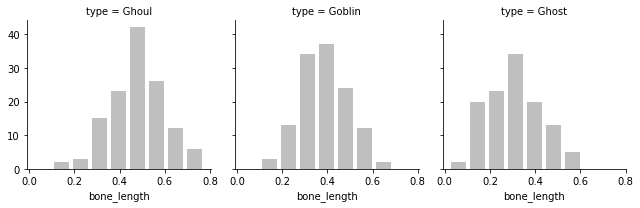

In [6]:
#Plotting bone_length value distribution by creature type
g = sns.FacetGrid(train_df, col = "type", col_wrap = 3)
bins = np.linspace(train_df.bone_length.min(), train_df.bone_length.max(), 10)
g.map(plt.hist, "bone_length", align = "left", color = "gray", alpha = 0.5, rwidth = 0.8, bins = bins)
plt.show()

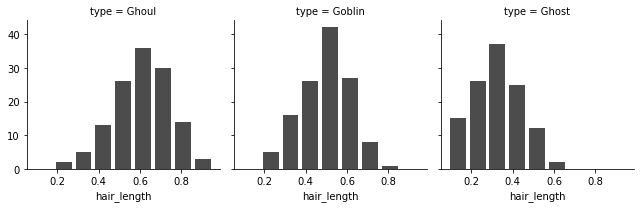

In [7]:
#Plotting hair_length value distribution by creature type
g = sns.FacetGrid(train_df, col = "type", col_wrap = 3)
bins = np.linspace(train_df.hair_length.min(), train_df.hair_length.max(), 10)
g.map(plt.hist, "hair_length", align = "left", color = "black", alpha = 0.7, rwidth = 0.8, bins = bins)
plt.show()

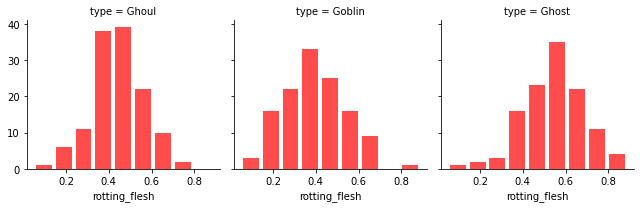

In [8]:
#Plotting rotting_flesh value distribution by creature type
g = sns.FacetGrid(train_df, col = "type", col_wrap = 3)
bins = np.linspace(train_df.rotting_flesh.min(), train_df.rotting_flesh.max(), 10)
g.map(plt.hist, "rotting_flesh", align = "left", color = "red", alpha = 0.7, rwidth = 0.8, bins = bins)
plt.show()

Other than the categorical variable "color", the features seem normalized. Let's get an overview of the data using Seaborn's pair plot.

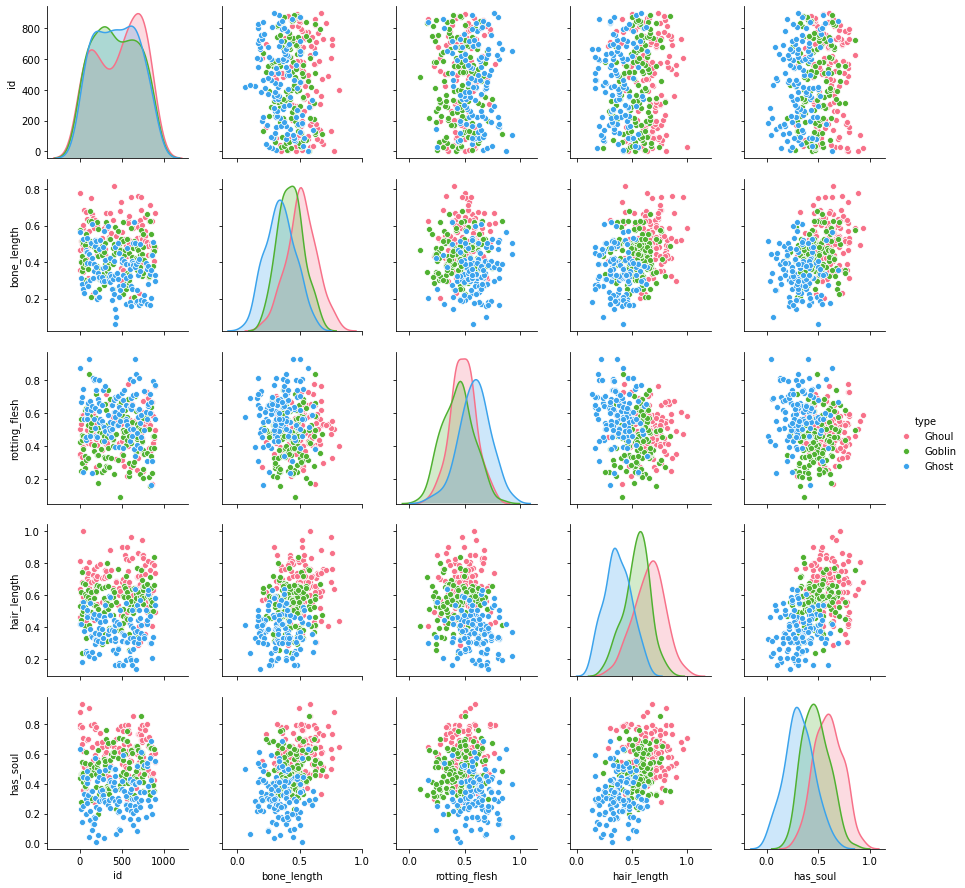

In [9]:
#Seaborn pairplot
sns.pairplot(train_df, hue = "type", palette = "husl")

In [10]:
#Before applying classification methods, let's assign numerical values to the categorical column "color"
train_df["color"].replace(to_replace = ["green", "blue", "white", "black", "clear", "blood"], value = range(6), inplace = True)

#Let's separate our data set for classification
y = train_df["type"]
train_df = train_df.drop(columns = ["id", "type"])

### KNN Classification

In [11]:
#Creating training and testing sets from the train dataframe
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.3, random_state = 2)

In [12]:
#Calculating the accuracy of KNN Classification model with differnt k values
ks = 10
mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks - 1))

#Calculating accuracy scores and storing the values in an array using a for loop
for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
#Printing the best accuracy score and k value for KNN model
print("Best accuracy score: ", mean_acc.max(), "\nk= ", mean_acc.argmax())

Best accuracy score:  0.7678571428571429 
k=  6


### Decision Tree

In [13]:
#Applying different depth values and determinin the most accuracte model
depth = 20
mean_acc = np.zeros((depth - 1))

#Calculating accuracy scores and storing the values in an array using a for loop
for n in range(5, depth):
    dTree = DecisionTreeClassifier(criterion = "entropy", max_depth = n)
    dTree.fit(X_train, y_train)
    pTree = dTree.predict(X_test)
    mean_acc [n - 1] = metrics.accuracy_score(y_test, pTree)
    
#Printing the best accuracy score and depth value for decision tree
print("Best accuracy score: ", mean_acc.max(), "\nk= ", mean_acc.argmax())

Best accuracy score:  0.7232142857142857 
k=  11


### Support Vector Machine

In [14]:
#Generating svm classification model using the default radial basis function
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Logistic Regression

In [15]:
#Generating logistic regression model
lr = LogisticRegression(solver = "liblinear").fit(X_train, y_train)
yhat = lr.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Model Evaluation

In [16]:
#Prediction values for each model
#KNN model
neigh1 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
yhat = neigh1.predict(X_test)

#Decision Tree model
dTree1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 10).fit(X_train, y_train)
yhat1 = dTree1.predict(X_test)

#SVM model
cdf1 = svm.SVC(kernel = "rbf").fit(X_train, y_train)
yhat2 = cdf1.predict(X_test)

#logistic regression model
lr1 = LogisticRegression(solver = "liblinear").fit(X_train, y_train)
yhat3 = lr1.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [17]:
#Importing the libraries needed for Jaccard and F-1 score calculations
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [18]:
predictionarray = [yhat, yhat1, yhat2, yhat3]
accuracyscores = {"Algorithm" : ["KNN", "Decision Tree", "SVM", "LogisticRegression"],
                  "Jaccard" : [0, 0, 0, 0], "F1-score" : [0, 0, 0, 0]}
for i in range(len(predictionarray)):
    accuracyscores["Jaccard"][i] = jaccard_similarity_score(y_test, predictionarray[i])
    accuracyscores["F1-score"][i] = f1_score(y_test, predictionarray[i], average = "weighted")

In [19]:
acc_df = pd.DataFrame(accuracyscores)
acc_df

,Algorithm,Jaccard,F1-score
0,KNN,0.750000,0.741600
1,Decision Tree,0.705357,0.701894
2,SVM,0.732143,0.737257
3,LogisticRegression,0.767857,0.751673


Logistic Regression seems to be the best classification model based on Jaccard and F1-score. Let's use this for predicting the test set.

### Applying the Algorithm

In [20]:
#Importing test set
test_df = pd.read_csv("test.csv")
test_df[:10]

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
5,14,0.292890,0.505851,0.297927,0.106263,white
6,15,0.584456,0.551680,0.628330,0.499118,white
7,16,0.485525,0.459242,0.657735,0.565337,blue
8,17,0.471757,0.407916,0.465992,0.406608,blue
9,18,0.572953,0.316454,0.668388,0.640692,clear


In [21]:
#Converting categorical column color into numerical values
test_df["color"].replace(to_replace = ["green", "blue", "white", "black", "clear", "blood"], value = range(6), inplace = True)
creatureid = test_df["id"]
test_df = test_df.drop(columns = "id")

In [22]:
#Classifying the creatures based on the test dataset features
yhat3 = lr1.predict(test_df)

In [23]:
#Combining the creature labels with the features-containing test dataset
yhat3_df= pd.DataFrame()
yhat3_df["id"] = creatureid
yhat3_df["type"] = yhat3

In [24]:
#Resetting the index of the results dataframe and exporting as a .csv file
yhat3_df.set_index("id")
yhat3_df.to_csv("results.csv")